# Importing Libraries

In [1]:
import pandas as pdf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from sklearn import preprocessing
import re
from wordcloud import WordCloud
import pandas
import string
from nltk.corpus import stopwords
import matplotlib.cm as cm
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading  Dataset

In [2]:
data = pdf.read_csv('dataset/tweets_tagged.csv',delimiter=',',encoding='latin-1')

In [3]:
data.tail()

,Sr No,tweet,label
9995,9996,January/04/20 #TuesdayThoughts ÒThe time is no...,1
9996,9997,Nobody can stop reggae ?? \n#CoronavirusOutbre...,3
9997,9998,?? Be careful where you get your news about #c...,1
9998,9999,"Today, @HHSgov took another important step in ...",1
9999,10000,"With the fear of #Coronavirus spreading, emplo...",3


# Selection of the interested columns for feature extraction 

In [4]:
data=data[['tweet','label']]

In [5]:
data.head()

,tweet,label
0,Hysteria surrounding #coronavirus NZ daycare r...,3
1,Thank you @TheOnion for dragging all of us und...,1
2,#avetmissdone is catching on faster than the #...,1
3,They just said #Tonysnell was back from the fl...,2
4,Forget locking them up on an island to die slo...,2


# Count of the dataset

In [6]:
print('Count of the dataset is: ', len(data))

Count of the dataset is:  10000


# Dataset analysis and Preprocessing

# tweet text in lower case

In [7]:
data['tweet']=data['tweet'].str.lower()

In [8]:
data['tweet'].head()

0    hysteria surrounding #coronavirus nz daycare r...
1    thank you @theonion for dragging all of us und...
2    #avetmissdone is catching on faster than the #...
3    they just said #tonysnell was back from the fl...
4    forget locking them up on an island to die slo...
Name: tweet, dtype: object

# Encoding 1 tag as positive

In [9]:
data['label'] = data['label'].replace({1: 'positive'})

In [10]:
data['label'].head()

0           3
1    positive
2    positive
3           2
4           2
Name: label, dtype: object

# Encoding 2 tag as negative

In [11]:
data['label'] = data['label'].replace({2: 'negative'})

In [12]:
data['label'].head()

0           3
1    positive
2    positive
3    negative
4    negative
Name: label, dtype: object

# Encoding 3 tag as neutral

In [13]:
data['label'] = data['label'].replace({3: 'neutral'})

In [14]:
data['label'].head()

0     neutral
1    positive
2    positive
3    negative
4    negative
Name: label, dtype: object

# all columns

In [15]:
data.columns

Index(['tweet', 'label'], dtype='object')

# Unique tweets labels

In [16]:
data['label'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

# data types of all columns

In [17]:
data.dtypes

tweet    object
label    object
dtype: object

# Checking Null values

In [18]:
data[data.isnull().any(axis=1)]

,tweet,label


# Count of Null values

In [19]:
import numpy as np
np.sum(data.isnull().any(axis=1))

0

# Data information

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
tweet    10000 non-null object
label    10000 non-null object
dtypes: object(2)
memory usage: 156.4+ KB


# Frequency Distribution of label

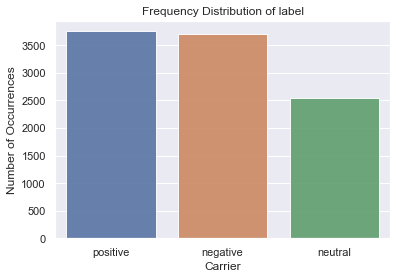

In [21]:
%matplotlib inline
carrier_count = data["label"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of label')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

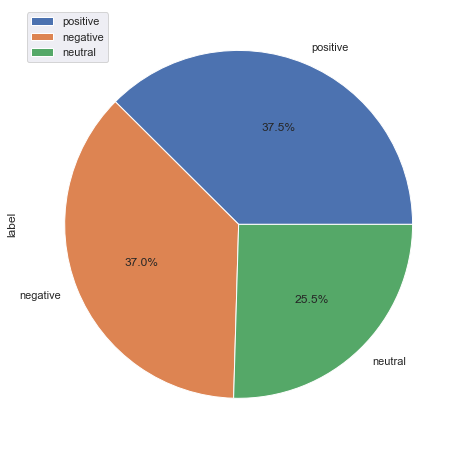

In [22]:
data["label"].value_counts().head(3).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

In [23]:
data["label"].value_counts()

positive    3754
negative    3700
neutral     2546
Name: label, dtype: int64

# Preproccessing of words

In [24]:
data.loc[data["tweet"].str.contains('america'), 'tweet'] = 'american'
data.loc[data["tweet"].str.contains('americans'), 'tweet'] = 'american'
data.loc[data["tweet"].str.contains('youore'), 'tweet'] = 'you are'
data.loc[data["tweet"].str.contains('youre'), 'tweet'] = 'you are'
data.loc[data["tweet"].str.contains('years'), 'tweet'] = 'year'
data.loc[data["tweet"].str.contains('break'), 'tweet'] = 'breakingnews'
data.loc[data["tweet"].str.contains('breaking'), 'tweet'] = 'breakingnews'
data.loc[data["tweet"].str.contains('caused'), 'tweet'] = 'cause'
data.loc[data["tweet"].str.contains('causes'), 'tweet'] = 'cause'
data.loc[data["tweet"].str.contains('coronarivirus'), 'tweet'] = 'coronavirus'
data.loc[data["tweet"].str.contains('coronarivus'), 'tweet'] = 'coronavirus'
data.loc[data["tweet"].str.contains('coronarvirues'), 'tweet'] = 'coronavirus'
data.loc[data["tweet"].str.contains('coronarvirus'), 'tweet'] = 'coronavirus'
data.loc[data["tweet"].str.contains('coronaviruse'), 'tweet'] = 'coronavirus'
data.loc[data["tweet"].str.contains('coronavirusec'), 'tweet'] = 'coronavirus'
data.loc[data["tweet"].str.contains('coronaviruses'), 'tweet'] = 'coronavirus'
data.loc[data["tweet"].str.contains('coronarivirus'), 'tweet'] = 'coronavirus'
data.loc[data["tweet"].str.contains('county'), 'tweet'] = 'country'

In [25]:
for letter in '1234567890.(/':
    data["tweet"] = data["tweet"].str.replace(letter,'')

# Preprocess data on Descripcion

In [26]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

# Remove_repeating_char

In [27]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

# ProcessPost for applying all functions

In [28]:
def processPost(text): 

    text = re.sub('@[^\s]+', ' ', text)
    

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)

    text = re.sub(r'#([^\s]+)', r'\1', text)

    text= remove_punctuations(text)
    text=remove_repeating_char(text)
    
    return text

# Applying processPost function for preprocessing

In [29]:
data["tweet"] = data["tweet"].apply(lambda x: processPost(x))

# Getting Tokenization

In [30]:
tokenizer = RegexpTokenizer(r'\w+')
data["tweet"] = data["tweet"].apply(tokenizer.tokenize)

In [31]:
data["tweet"].head()

0    [hysteria, surounding, coronavirus, nz, daycar...
1    [thank, you, for, draging, al, of, us, under, ...
2    [avetmisdone, is, catching, on, faster, than, ...
3    [they, just, said, tonysnel, was, back, from, ...
4    [forget, locking, them, up, on, an, island, to...
Name: tweet, dtype: object

# Stop words of english

In [32]:
stopwords_list = stopwords.words('english')

In [33]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
len(stopwords_list)

179

In [35]:
data["tweet"]=data["tweet"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [36]:
data["tweet"].head()

0    [hysteria, surounding, coronavirus, nz, daycar...
1    [thank, draging, al, us, artful, guise, satire...
2    [avetmisdone, catching, faster, coronavirus, d...
3    [said, tonysnel, back, flu, said, shot, like, ...
4    [forget, locking, island, die, slowly, jesica,...
Name: tweet, dtype: object

# Removing most frequently used words

In [37]:
drop_most_words=['coronavirus', 'coronavirusoutbreak', 'china', 'wuhan', 'amp', 'corona', '2019ncov','people']
data["tweet"]=data["tweet"].apply(lambda x: [item for item in x if item not in drop_most_words])
data["tweet"].head()

0    [hysteria, surounding, nz, daycare, requesting...
1    [thank, draging, al, us, artful, guise, satire...
2         [avetmisdone, catching, faster, deaths, yet]
3        [said, tonysnel, back, flu, said, shot, like]
4    [forget, locking, island, die, slowly, jesica,...
Name: tweet, dtype: object

# Description of text information

In [38]:
all_words = [word for tokens in data["tweet"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["tweet"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

85237 words total, with a vocabulary size of 19114
Max sentence length is 39


# Top 25 words in tweets text

In [39]:
counter = Counter(all_words)

In [40]:
counter.most_common(20)

[('breakingnews', 1763),
 ('virus', 633),
 ('ncov', 573),
 ('al', 561),
 ('cases', 498),
 ('confirmed', 437),
 ('wil', 395),
 ('us', 387),
 ('new', 360),
 ('like', 343),
 ('spread', 331),
 ('god', 317),
 ('health', 308),
 ('chinese', 306),
 ('safe', 302),
 ('latest', 290),
 ('infected', 282),
 ('get', 278),
 ('time', 267),
 ('news', 261)]

In [41]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

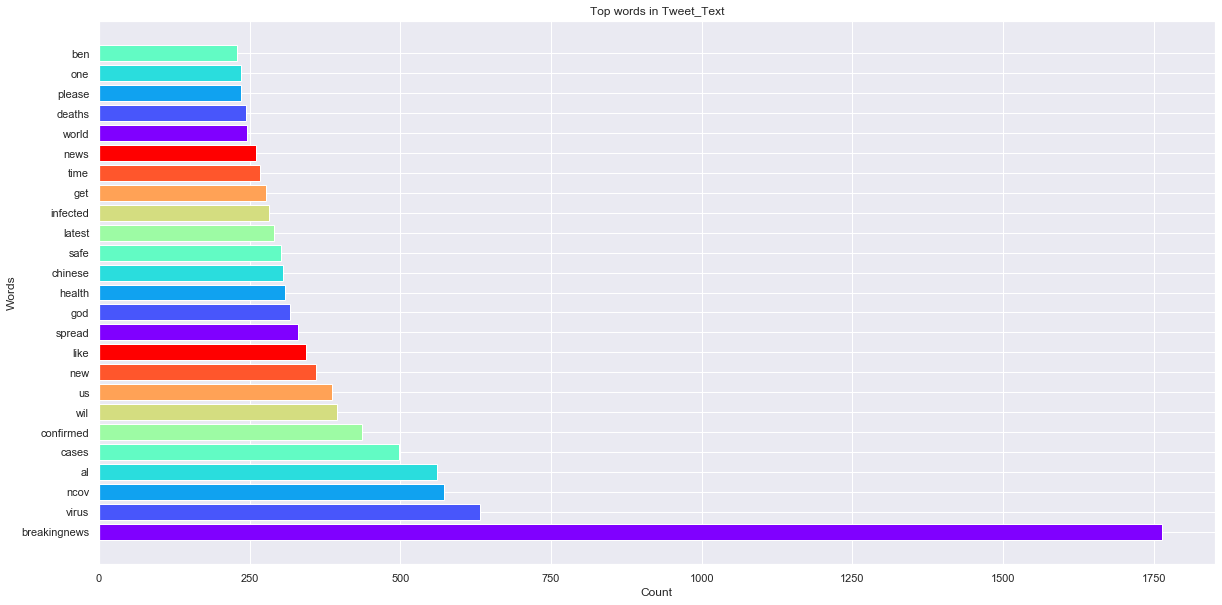

In [42]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in Tweet_Text')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# Word cloud of Positive Class

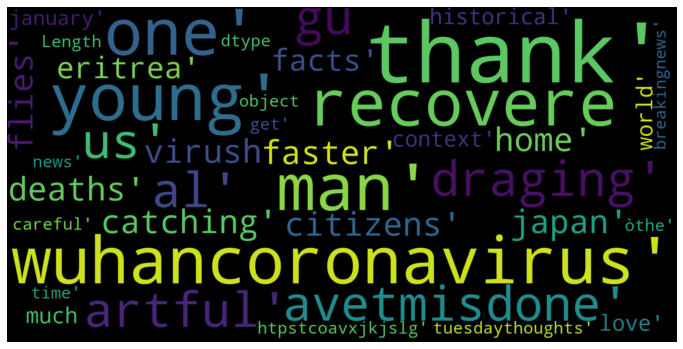

In [43]:
data1=data[data['label']=='positive']
neg =data1['tweet']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pandas.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Word cloud of Negative Class

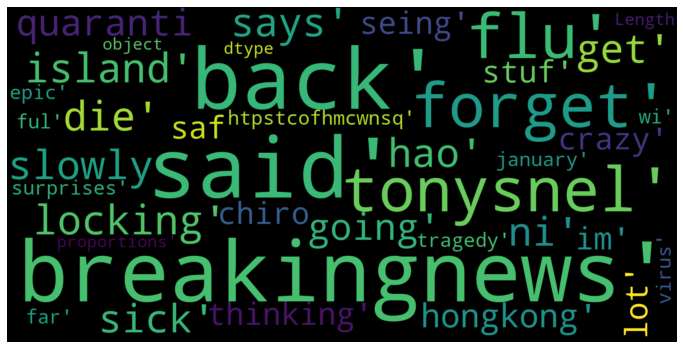

In [44]:
data1=data[data['label']=='negative']
neg =data1['tweet']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pandas.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Word cloud of Neutral Class

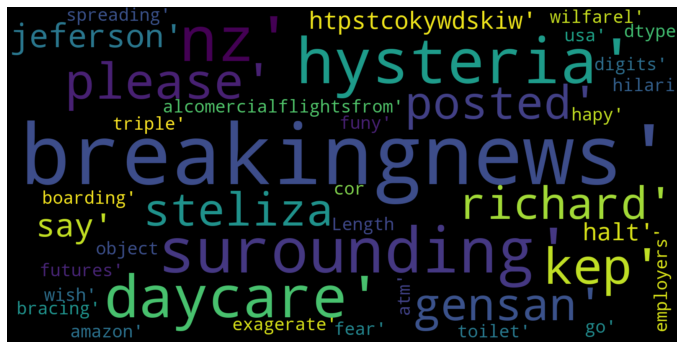

In [45]:
data1=data[data['label']=='neutral']
neg =data1['tweet']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pandas.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Features Extraction From the Tweets Text

# - Unigram features

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features =1000)

# Preparing features for training and testing

In [47]:
unigramdataGet= word_vectorizer.fit_transform(data['tweet'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names()
unigramdata=pdf.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata[unigramdata>0] = 1
unigramdata.head()

,acording,acros,action,actual,actualy,ad,advice,advisory,afect,afected,...,yearold,yes,yesterday,yoal,york,youore,youre,youtube,zero,ð
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# First 100 words of vocab

In [48]:
vocab[0:100]

['acording',
 'acros',
 'action',
 'actual',
 'actualy',
 'ad',
 'advice',
 'advisory',
 'afect',
 'afected',
 'afraid',
 'africa',
 'ago',
 'aids',
 'aint',
 'air',
 'airlines',
 'airport',
 'airports',
 'al',
 'alah',
 'alcohol',
 'alert',
 'alive',
 'amazon',
 'american',
 'amid',
 'amzn',
 'analysis',
 'ang',
 'animal',
 'animals',
 'anounced',
 'anymore',
 'aparently',
 'apears',
 'aple',
 'area',
 'areas',
 'arived',
 'article',
 'asia',
 'asian',
 'asianetwalking',
 'asking',
 'atack',
 'atention',
 'auspol',
 'australia',
 'authorities',
 'available',
 'avoid',
 'aware',
 'awarenes',
 'away',
 'b',
 'ba',
 'baba',
 'baby',
 'bac',
 'bad',
 'ban',
 'baned',
 'based',
 'bat',
 'bats',
 'bc',
 'beat',
 'beds',
 'beijing',
 'believe',
 'ben',
 'ber',
 'best',
 'beter',
 'betwen',
 'big',
 'bigest',
 'biological',
 'bioweapon',
 'bit',
 'bitcoin',
 'blbkitui',
 'bles',
 'blod',
 'blog',
 'body',
 'border',
 'borders',
 'boy',
 'brave',
 'breakingnews',
 'brexit',
 'brexitday',
 'bri

In [49]:
print('Vocab Lenght ', len(vocab))

Vocab Lenght  1000


In [50]:
len(unigramdata)

10000

# - Bigram features

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(2, 2),
    max_features =1000)


# Preparing features for training and testing 

In [52]:
BiagramdataGet= word_vectorizer.fit_transform(data['tweet'].astype('str'))
BiagramdataGet= BiagramdataGet.toarray()

vocab1 = word_vectorizer.get_feature_names()
Biagramdata=pd.DataFrame(np.round(BiagramdataGet, 1), columns=vocab1)
Biagramdata[Biagramdata>0] = 1
Biagramdata.head(5)

,acute respiratory,advice info,advice novel,advice public,afectes details,ago cases,air india,air purifier,al afected,al chinese,...,wuhanvirus chinavirus,xijinping yelowfever,yearofthebat comie,yearoftherat yearofthebat,yearold man,yelowfever wuhanpneumonia,yes clear,youve recently,yr old,zero hedge
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# First 100 words of vocab1

In [53]:
vocab1[0:100]

['acute respiratory',
 'advice info',
 'advice novel',
 'advice public',
 'afectes details',
 'ago cases',
 'air india',
 'air purifier',
 'al afected',
 'al chinese',
 'al flights',
 'al infected',
 'al know',
 'al memes',
 'al ned',
 'al pray',
 'al spreadluv',
 'al stores',
 'al things',
 'al times',
 'al world',
 'alah hu',
 'alah protect',
 'amazon virus',
 'amzn fb',
 'anchor laughs',
 'angelina jolie',
 'animals causing',
 'answer questions',
 'answering comon',
 'anytime son',
 'apron gogles',
 'arived afectes',
 'arora daily',
 'arowe park',
 'asia thailand',
 'asia update',
 'atack public',
 'aus gertai',
 'australia malaysia',
 'australias digital',
 'authorities spread',
 'avoid contact',
 'avoid fake',
 'avoid touching',
 'awarenes latest',
 'away coughing',
 'b merseyside',
 'ba lmt',
 'baba nke',
 'baby infected',
 'baby ne',
 'bac unh',
 'bad news',
 'bat soup',
 'bay area',
 'bc news',
 'bed hospital',
 'ben confirmed',
 'ben infected',
 'ben positive',
 'ben reported'

In [54]:
print('Vocab1 Lenght ', len(vocab1))

Vocab1 Lenght  1000


# - Trigram features

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(3, 3),
    max_features =1000)


# Preparing features for training and testing

In [56]:
TrigramdataGet= word_vectorizer.fit_transform(data['tweet'].astype('str'))
TrigramdataGet= TrigramdataGet.toarray()

vocab2 = word_vectorizer.get_feature_names()
Trigramdata=pd.DataFrame(np.round(TrigramdataGet, 1), columns=vocab1)
Trigramdata[Trigramdata>0] = 1
Trigramdata.head()

,acute respiratory,advice info,advice novel,advice public,afectes details,ago cases,air india,air purifier,al afected,al chinese,...,wuhanvirus chinavirus,xijinping yelowfever,yearofthebat comie,yearoftherat yearofthebat,yearold man,yelowfever wuhanpneumonia,yes clear,youve recently,yr old,zero hedge
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# First 100 words of vocab2

In [57]:
vocab2[0:100]

['aces fre debt',
 'actual leaked fotage',
 'aditional reporting hours',
 'advice novel herehtpstcodcrqzcv',
 'advice public government',
 'afectes details med',
 'ago cases deaths',
 'aid bypasing red',
 'air purifier verified',
 'al chinese social',
 'al ned know',
 'al spreadluv plz',
 'al stay safe',
 'al stores mainland',
 'alah hu akbar',
 'alergen masks moldex',
 'amazon virus kiling',
 'amzn fb sbux',
 'anc chiled af',
 'anchor laughs ncov',
 'angelina jolie teaming',
 'animals causing spread',
 'answer questions bust',
 'answering comon questions',
 'anthony fauci oitos',
 'antibiotics efective preventing',
 'antibiotics used means',
 'antibiotics work viruses',
 'apron gogles suits',
 'arived afectes details',
 'aset managers market',
 'asia thailand japan',
 'asia update ben',
 'atack public health',
 'athe ugaotrader post',
 'australias digital news',
 'authorities spread verified',
 'avoid contact ring',
 'avoid fake news',
 'awarenes latest confirmed',
 'away coughing sne

In [58]:
print('Vocab2 Lenght ', len(vocab2))

Vocab2 Lenght  1000


# Deleteing the tweet column because we have been extracted features from this

In [59]:
data.reset_index(drop=True, inplace=True)
data=data.drop(columns=['tweet'])

# Feature selection from the extracted features of unigram

In [60]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


selector = SelectKBest(chi2, k=700)
selector.fit(unigramdata, data['label'])

unigramdata = selector.transform(unigramdata)
print(unigramdata.shape)

(10000, 700)


# Feature selection from the extracted features of bigram

In [61]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


selector = SelectKBest(chi2, k=700)
selector.fit(Biagramdata, data['label'])

Biagramdata = selector.transform(Biagramdata)
print(Biagramdata.shape)

(10000, 700)


# Feature selection from the extracted features of trigram

In [62]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(chi2, k=700)
selector.fit(Trigramdata, data['label'])

Trigramdata = selector.transform(Trigramdata)
print(Trigramdata.shape)

(10000, 700)


# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -----------------------Traning and Testing with Unigram Features------------------------

# -------------------------------------------------------------------------------------------------------------

In [63]:
X=unigramdata
y=data['label']

# Data Balance with SMOTE library

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
smt = SMOTE()
X, y = smt.fit_sample(X, y)

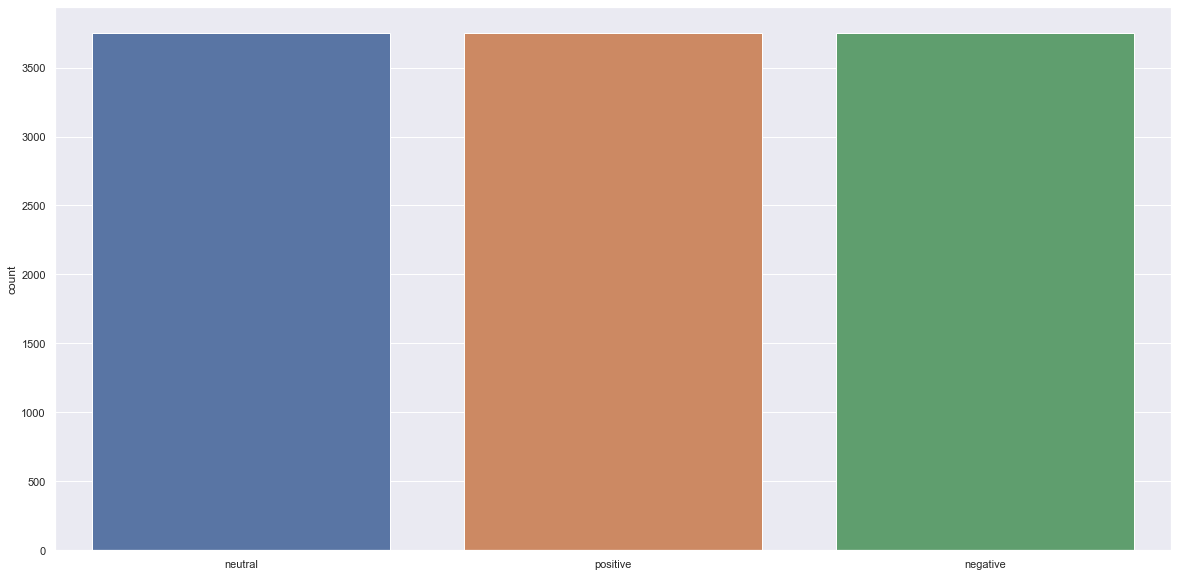

In [66]:
sns.countplot(data= data, x = y)
plt.show()

# Spliting Dataset into 70% Training and 30% Testing

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# SVM Support Vector Machine Algorithm

In [68]:
from sklearn.svm import LinearSVC

svc=LinearSVC(C=1, max_iter=500)
svc= svc.fit(X_train , y_train)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# Accuracy

In [69]:
y_pred1 = svc.predict(X_test)
dm=svc.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy score= 0.43


# Precision, Recall, F1

In [70]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.39      0.49      0.43      1125
     neutral       0.44      0.48      0.46      1110
    positive       0.49      0.33      0.39      1144

    accuracy                           0.43      3379
   macro avg       0.44      0.43      0.43      3379
weighted avg       0.44      0.43      0.43      3379





# Confusion Matrix



confusion matrix


[[549 353 223]
 [414 530 166]
 [447 320 377]]




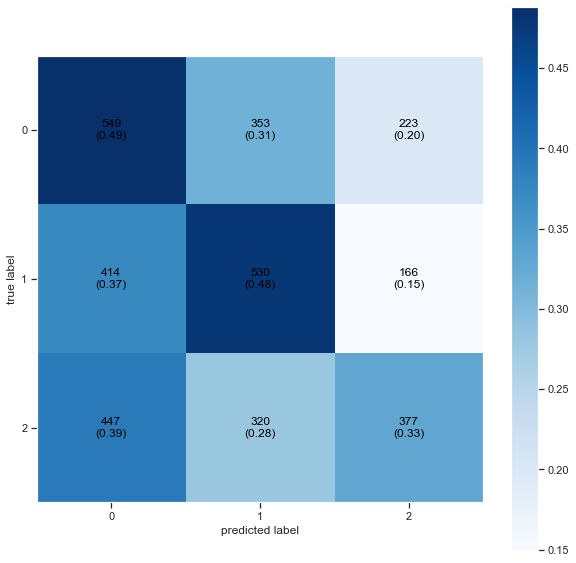

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Naive Bayes Algorithm

In [72]:
from sklearn.naive_bayes import GaussianNB


nab=GaussianNB(var_smoothing=1e-08)
nab= nab.fit(X_train , y_train)
nab

GaussianNB(priors=None, var_smoothing=1e-08)

# Accuracy

In [73]:
y_pred1 = nab.predict(X_test)
nb=nab.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(nab.score(X_test, y_test)))

Accuracy score= 0.42


# Precision, Recall, F1

In [74]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.47      0.20      0.28      1125
     neutral       0.38      0.79      0.52      1110
    positive       0.52      0.27      0.35      1144

    accuracy                           0.42      3379
   macro avg       0.46      0.42      0.38      3379
weighted avg       0.46      0.42      0.38      3379





# Confusion Matrix



confusion matrix


[[226 734 165]
 [115 882 113]
 [141 697 306]]




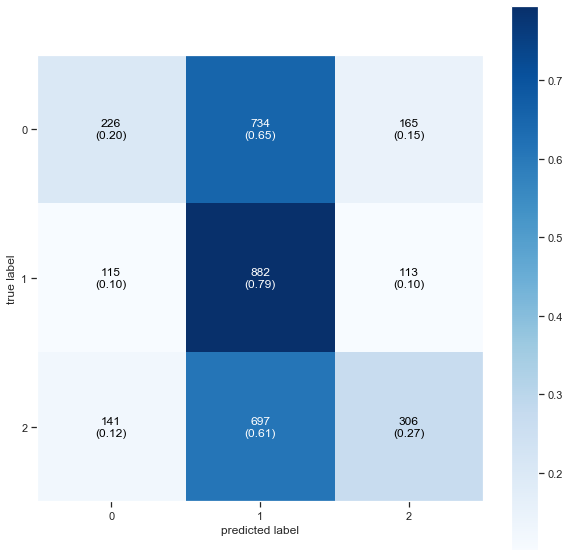

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Logistic Regression Algorithm

In [76]:
from sklearn.linear_model import LogisticRegression


lor=LogisticRegression(C=2, max_iter=100)
lor= lor.fit(X_train , y_train)
lor

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Accuracy

In [77]:
y_pred1 = lor.predict(X_test)
lr=lor.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(lor.score(X_test, y_test)))

Accuracy score= 0.43


# Precision, Recall, F1

In [78]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.39      0.48      0.43      1125
     neutral       0.44      0.48      0.46      1110
    positive       0.49      0.33      0.39      1144

    accuracy                           0.43      3379
   macro avg       0.44      0.43      0.43      3379
weighted avg       0.44      0.43      0.43      3379





# Confusion Matrix



confusion matrix


[[541 357 227]
 [413 537 160]
 [451 317 376]]




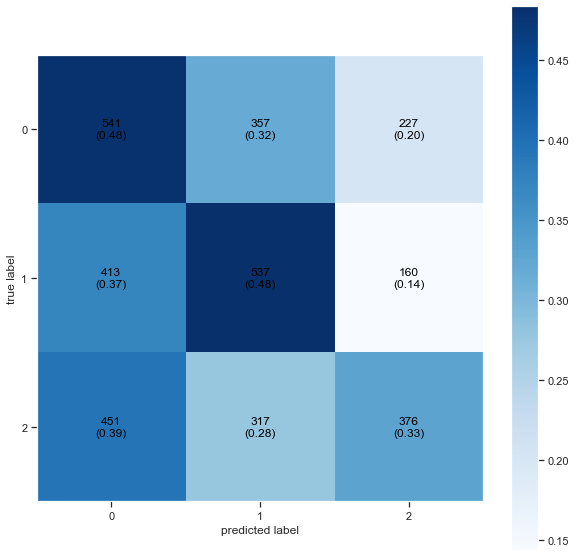

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Random Forest Algorithm

In [80]:
from sklearn.ensemble import RandomForestClassifier

raf=RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,random_state=100)
raf= raf.fit(X_train , y_train)
raf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

# Accuracy

In [81]:
y_pred1 = raf.predict(X_test)
rf=raf.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(raf.score(X_test, y_test)))

Accuracy score= 0.42


# Precision, Recall, F1

In [82]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.44      0.24      0.31      1125
     neutral       0.39      0.74      0.51      1110
    positive       0.51      0.30      0.38      1144

    accuracy                           0.42      3379
   macro avg       0.45      0.42      0.40      3379
weighted avg       0.45      0.42      0.40      3379





# Confusion Matrix



confusion matrix


[[270 671 184]
 [154 818 138]
 [189 616 339]]




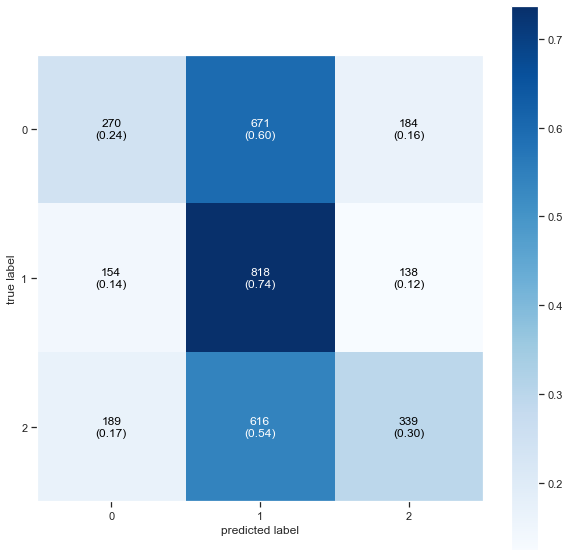

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Ensemble Technique to combine all algorithms and making one

In [84]:
svc = LinearSVC(C=1, max_iter=500)
nab  = GaussianNB(var_smoothing=1e-08)
log  = LogisticRegression(C=2, max_iter=100)
raf  = RandomForestClassifier(min_samples_leaf=10, min_samples_split=20,random_state=100)

In [85]:
from sklearn.ensemble import VotingClassifier
Ens = VotingClassifier( estimators= [('SVM',svc),('NB',nab),('Log',log),('raf',raf)], voting = 'hard')
Ens= Ens.fit(X_train , y_train)
Ens

VotingClassifier(estimators=[('SVM',
                              LinearSVC(C=1, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=500,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)),
                             ('NB',
                              GaussianNB(priors=None, var_smoothing=1e-08)),
                             ('Log',
                              LogisticRegression(C=2, class_weight=None,
                                                 dual=False, fit_intercept=Tru...
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
               

# Accuracy

In [86]:
y_pred1 = Ens.predict(X_test)
en=Ens.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(Ens.score(X_test, y_test)))

Accuracy score= 0.44


# Precision, Recall, F1

In [87]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.39      0.49      0.44      1125
     neutral       0.45      0.51      0.48      1110
    positive       0.52      0.31      0.39      1144

    accuracy                           0.44      3379
   macro avg       0.45      0.44      0.43      3379
weighted avg       0.45      0.44      0.43      3379





# Confusion Matrix



confusion matrix


[[555 369 201]
 [417 569 124]
 [453 339 352]]




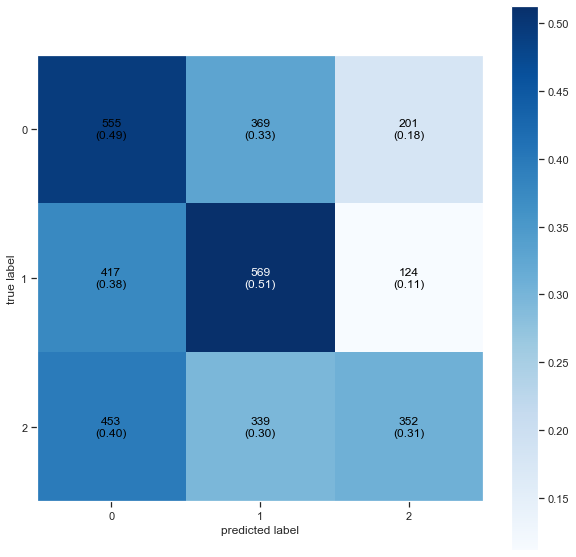

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Comparison of all algorithms Results

In [89]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["SVM Algorithm", round(dm,2)])
x.add_row(["Naive Bayes Algorithm", round(nb,2)])
x.add_row(["LogisticRegression Algorithm", round(lr,2)])
x.add_row(["Random Forest Algorithm", round(rf,2)])
x.add_row(["Ensemble Modelling", round(en,2)])

print(x)
print('\n')



Comparison of all algorithm results
+------------------------------+----------+
|            Model             | Accuracy |
+------------------------------+----------+
|        SVM Algorithm         |   0.43   |
|    Naive Bayes Algorithm     |   0.42   |
| LogisticRegression Algorithm |   0.43   |
|   Random Forest Algorithm    |   0.42   |
|      Ensemble Modelling      |   0.44   |
+------------------------------+----------+




# Best Model is Ensemble Model because of accuracy and hypothesis of all algorithms

In [90]:
x = PrettyTable()
print('\n')
print("Best Model.")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Ensemble Modelling",round(en,2)])
print(x)
print('\n')



Best Model.
+--------------------+----------+
|       Model        | Accuracy |
+--------------------+----------+
| Ensemble Modelling |   0.44   |
+--------------------+----------+




# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -----------------------Traning and Testing with Bigram Features------------------------

# -------------------------------------------------------------------------------------------------------------

In [91]:
X=Biagramdata
y=data['label']

# Data Balance with SMOTE library

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
smt = SMOTE()
X, y = smt.fit_sample(X, y)

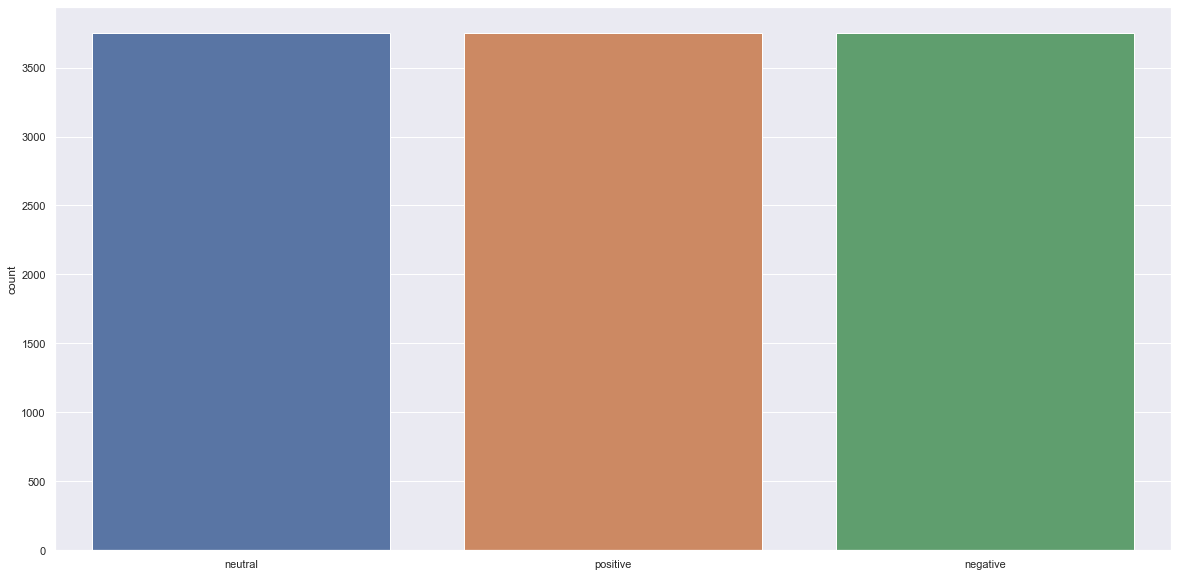

In [94]:
sns.countplot(data= data, x = y)
plt.show()

# Spliting Dataset into 70% Training and 30% Testing

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# SVM Support Vector Machine Algorithm

In [96]:
from sklearn.svm import LinearSVC

svc=LinearSVC(C=1, max_iter=500)
svc= svc.fit(X_train , y_train)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# Accuracy

In [97]:
y_pred1 = svc.predict(X_test)
dm=svc.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy score= 0.38


# Precision, Recall, F1

In [98]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.48      0.11      0.17      1125
     neutral       0.35      0.88      0.50      1110
    positive       0.54      0.15      0.24      1144

    accuracy                           0.38      3379
   macro avg       0.46      0.38      0.30      3379
weighted avg       0.46      0.38      0.30      3379





# Confusion Matrix



confusion matrix


[[120 921  84]
 [ 67 980  63]
 [ 62 907 175]]




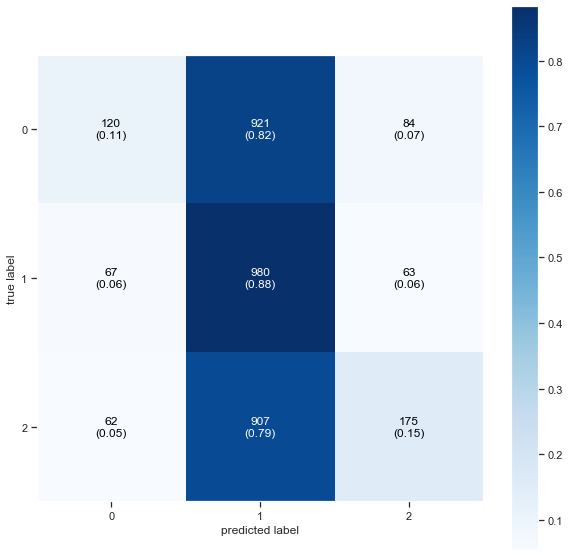

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Naive Bayes Algorithm

In [100]:
from sklearn.naive_bayes import GaussianNB


nab=GaussianNB(var_smoothing=1e-08)
nab= nab.fit(X_train , y_train)
nab

GaussianNB(priors=None, var_smoothing=1e-08)

# Accuracy

In [101]:
y_pred1 = nab.predict(X_test)
nb=nab.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(nab.score(X_test, y_test)))

Accuracy score= 0.38


# Precision, Recall, F1

In [102]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.55      0.07      0.13      1125
     neutral       0.35      0.95      0.51      1110
    positive       0.65      0.12      0.20      1144

    accuracy                           0.38      3379
   macro avg       0.52      0.38      0.28      3379
weighted avg       0.52      0.38      0.28      3379





# Confusion Matrix



confusion matrix


[[  84  988   53]
 [  30 1058   22]
 [  39  966  139]]




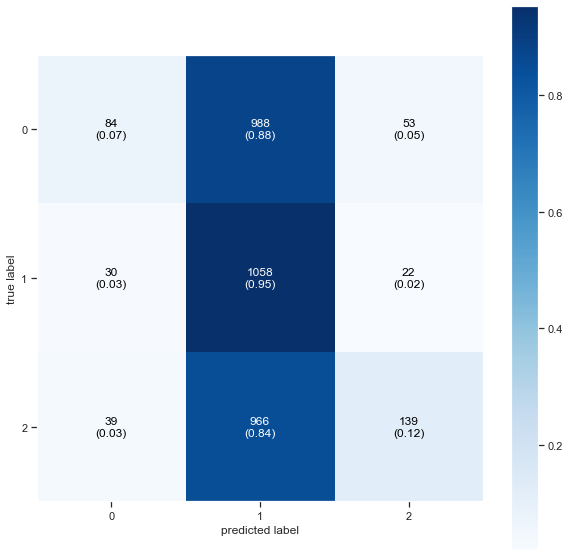

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Logistic Regression Algorithm

In [104]:
from sklearn.linear_model import LogisticRegression


lor=LogisticRegression(C=2, max_iter=100)
lor= lor.fit(X_train , y_train)
lor

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Accuracy

In [105]:
y_pred1 = lor.predict(X_test)
lr=lor.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(lor.score(X_test, y_test)))

Accuracy score= 0.39


# Precision, Recall, F1

In [106]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.35      0.88      0.50      1125
     neutral       0.54      0.14      0.22      1110
    positive       0.56      0.15      0.24      1144

    accuracy                           0.39      3379
   macro avg       0.49      0.39      0.32      3379
weighted avg       0.49      0.39      0.32      3379





# Confusion Matrix



confusion matrix


[[986  61  78]
 [895 155  60]
 [899  70 175]]




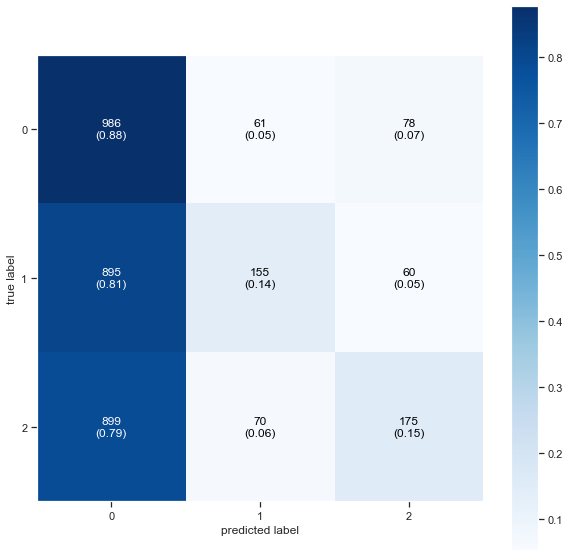

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Random Forest Algorithm

In [108]:
from sklearn.ensemble import RandomForestClassifier

raf=RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,random_state=100)
raf= raf.fit(X_train , y_train)
raf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

# Accuracy

In [109]:
y_pred1 = raf.predict(X_test)
rf=raf.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(raf.score(X_test, y_test)))

Accuracy score= 0.36


# Precision, Recall, F1

In [110]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.34      0.95      0.50      1125
     neutral       0.64      0.04      0.08      1110
    positive       0.58      0.07      0.13      1144

    accuracy                           0.36      3379
   macro avg       0.52      0.36      0.24      3379
weighted avg       0.52      0.36      0.24      3379





# Confusion Matrix



confusion matrix


[[1074   18   33]
 [1032   49   29]
 [1050   10   84]]




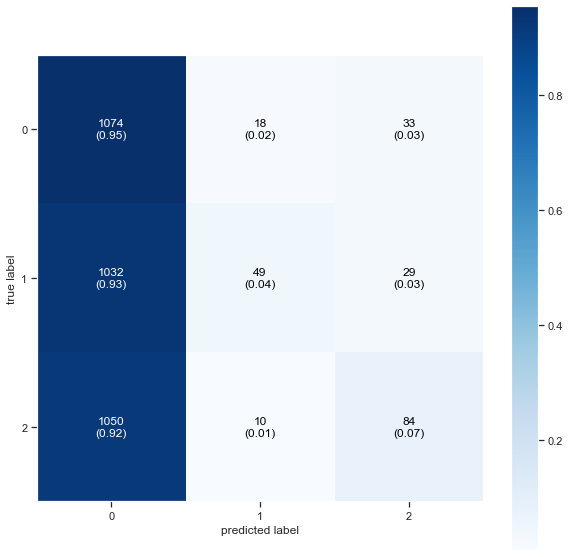

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Ensemble Technique to combine all algorithms and making one

In [112]:
svc = LinearSVC(C=1, max_iter=500)
nab  = GaussianNB(var_smoothing=1e-08)
log  = LogisticRegression(C=2, max_iter=100)
raf  = RandomForestClassifier(min_samples_leaf=10, min_samples_split=20,random_state=100)

In [113]:
from sklearn.ensemble import VotingClassifier
Ens = VotingClassifier( estimators= [('SVM',svc),('NB',nab),('Log',log),('raf',raf)], voting = 'hard')
Ens= Ens.fit(X_train , y_train)
Ens

VotingClassifier(estimators=[('SVM',
                              LinearSVC(C=1, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=500,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)),
                             ('NB',
                              GaussianNB(priors=None, var_smoothing=1e-08)),
                             ('Log',
                              LogisticRegression(C=2, class_weight=None,
                                                 dual=False, fit_intercept=Tru...
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
               

# Accuracy

In [114]:
y_pred1 = Ens.predict(X_test)
en=Ens.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(Ens.score(X_test, y_test)))

Accuracy score= 0.39


# Precision, Recall, F1

In [115]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.36      0.88      0.51      1125
     neutral       0.54      0.14      0.22      1110
    positive       0.57      0.15      0.23      1144

    accuracy                           0.39      3379
   macro avg       0.49      0.39      0.32      3379
weighted avg       0.49      0.39      0.32      3379





# Confusion Matrix



confusion matrix


[[993  60  72]
 [898 156  56]
 [904  71 169]]




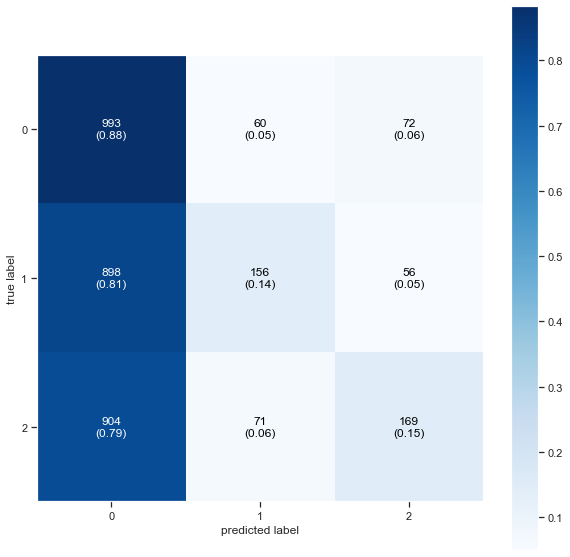

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Comparison of all algorithms Results

In [117]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["SVM Algorithm", round(dm,2)])
x.add_row(["Naive Bayes Algorithm", round(nb,2)])
x.add_row(["LogisticRegression Algorithm", round(lr,2)])
x.add_row(["Random Forest Algorithm", round(rf,2)])
x.add_row(["Ensemble Modelling", round(en,2)])

print(x)
print('\n')



Comparison of all algorithm results
+------------------------------+----------+
|            Model             | Accuracy |
+------------------------------+----------+
|        SVM Algorithm         |   0.38   |
|    Naive Bayes Algorithm     |   0.38   |
| LogisticRegression Algorithm |   0.39   |
|   Random Forest Algorithm    |   0.36   |
|      Ensemble Modelling      |   0.39   |
+------------------------------+----------+




# Best Model is Ensemble Model because of accuracy and hypothesis of all algorithms

In [118]:
x = PrettyTable()
print('\n')
print("Best Model.")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Ensemble Modelling",round(en,2)])
print(x)
print('\n')



Best Model.
+--------------------+----------+
|       Model        | Accuracy |
+--------------------+----------+
| Ensemble Modelling |   0.39   |
+--------------------+----------+




# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -----------------------Traning and Testing with Trigram Features------------------------

# -------------------------------------------------------------------------------------------------------------

In [119]:
X=Trigramdata
y=data['label']

# Data Balance with SMOTE library

In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
smt = SMOTE()
X, y = smt.fit_sample(X, y)

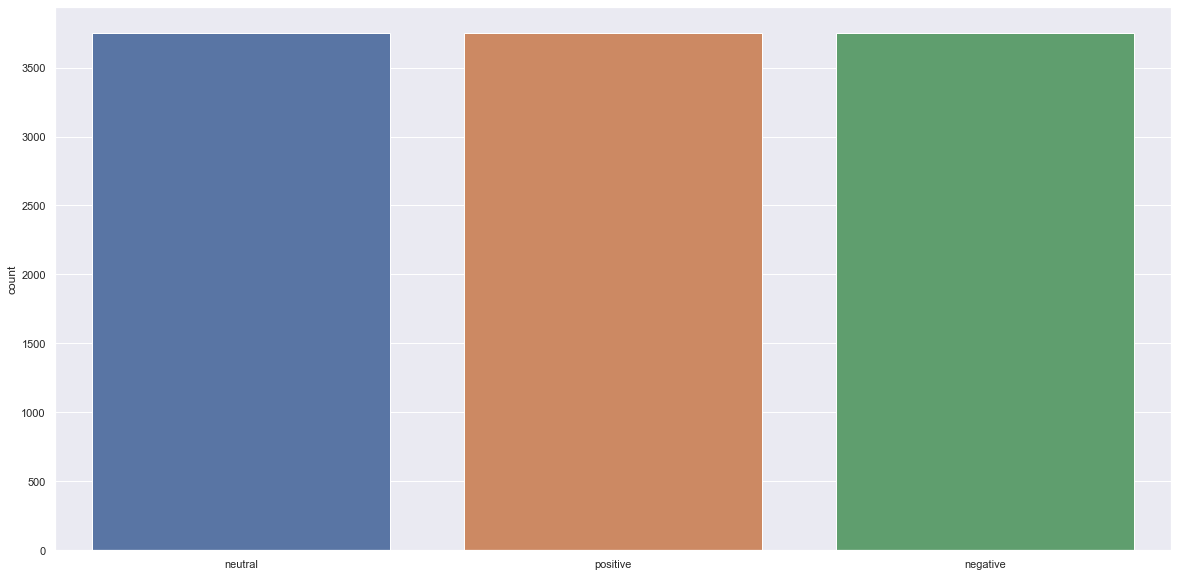

In [122]:
sns.countplot(data= data, x = y)
plt.show()

# Spliting Dataset into 70% Training and 30% Testing

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# SVM Support Vector Machine Algorithm

In [129]:
from sklearn.svm import SVC

svc=SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.332, total=  58.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.342, total=  59.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.0min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.338, total=  58.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.348, total= 1.0min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.348, total= 1.1min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.335, total=  59.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.338, total= 1.1min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.351, total= 1.1min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.346, total= 1.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.347, total=  55.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.354, total=  54.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.356, total=  55.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.353, total=  57.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.356, total=  59.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.341, total=  57.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.349, total=  57.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.360, total=  56.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.360, total=  56.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.351, total= 1.1min
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.363, total=  58.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.355, total=  55.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.355, total= 1.1min
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.355, total= 1.1min


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 125.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

# Accuracy

In [130]:
y_pred1 = grid.predict(X_test)
dm=grid.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(grid.score(X_test, y_test)))

Accuracy score= 0.36


# Precision, Recall, F1

In [144]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.34      0.96      0.51      1125
     neutral       0.59      0.06      0.11      1110
    positive       0.64      0.07      0.12      1144

    accuracy                           0.36      3379
   macro avg       0.52      0.36      0.25      3379
weighted avg       0.52      0.36      0.25      3379





# Confusion Matrix



confusion matrix


[[1079   21   25]
 [1021   70   19]
 [1040   27   77]]




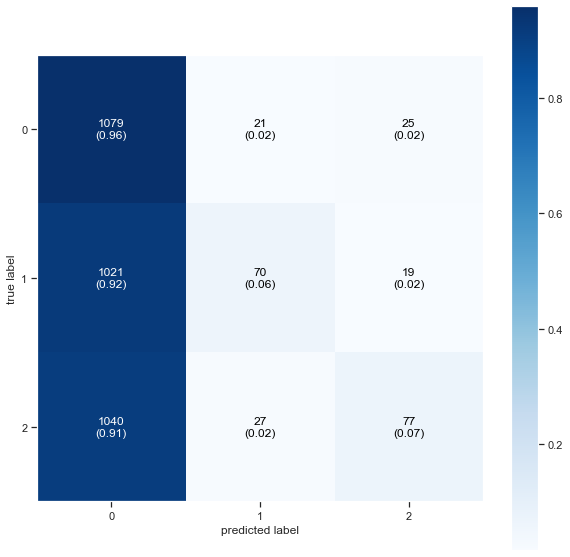

In [145]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Naive Bayes Algorithm

In [146]:
from sklearn.naive_bayes import GaussianNB


nab=GaussianNB(var_smoothing=1e-08)
nab= nab.fit(X_train , y_train)
nab

GaussianNB(priors=None, var_smoothing=1e-08)

# Accuracy

In [147]:
y_pred1 = nab.predict(X_test)
nb=nab.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(nab.score(X_test, y_test)))

Accuracy score= 0.36


# Precision, Recall, F1

In [148]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.67      0.04      0.07      1125
     neutral       0.34      0.98      0.51      1110
    positive       0.69      0.08      0.14      1144

    accuracy                           0.36      3379
   macro avg       0.57      0.36      0.24      3379
weighted avg       0.57      0.36      0.23      3379





# Confusion Matrix



confusion matrix


[[  40 1059   26]
 [   9 1088   13]
 [  11 1047   86]]




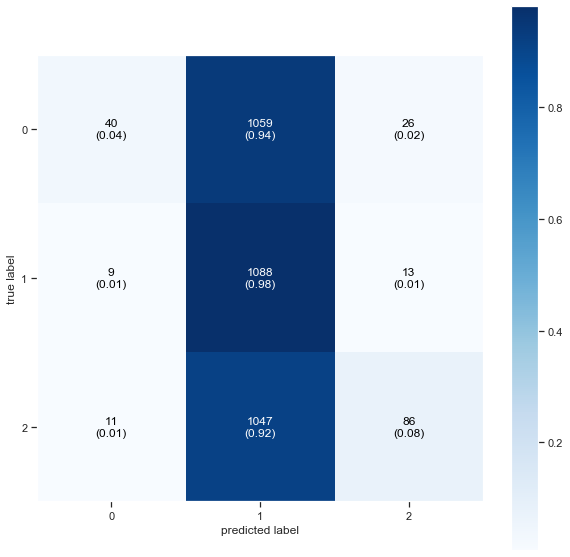

In [149]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Logistic Regression Algorithm

In [150]:
from sklearn.linear_model import LogisticRegression


lor=LogisticRegression(C=2, max_iter=100)
lor= lor.fit(X_train , y_train)
lor

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Accuracy

In [151]:
y_pred1 = lor.predict(X_test)
lr=lor.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(lor.score(X_test, y_test)))

Accuracy score= 0.36


# Precision, Recall, F1

In [152]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.34      0.96      0.51      1125
     neutral       0.59      0.06      0.11      1110
    positive       0.64      0.07      0.13      1144

    accuracy                           0.36      3379
   macro avg       0.52      0.36      0.25      3379
weighted avg       0.52      0.36      0.25      3379





# Confusion Matrix



confusion matrix


[[1078   22   25]
 [1020   70   20]
 [1037   27   80]]




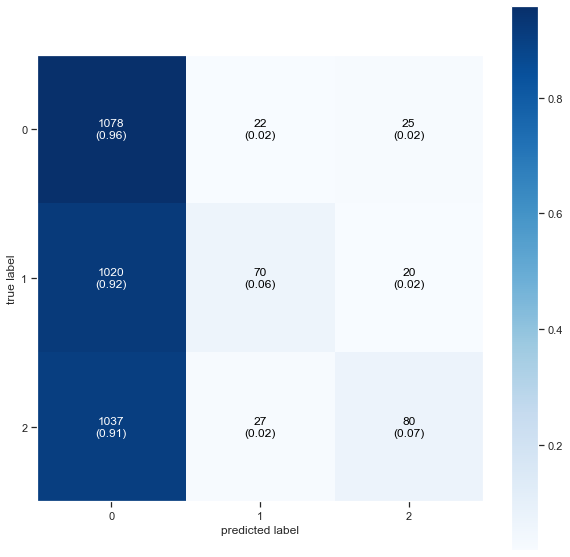

In [153]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Random Forest Algorithm

In [154]:
from sklearn.ensemble import RandomForestClassifier

raf=RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,random_state=100)
raf= raf.fit(X_train , y_train)
raf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

# Accuracy

In [155]:
y_pred1 = raf.predict(X_test)
rf=raf.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(raf.score(X_test, y_test)))

Accuracy score= 0.33


# Precision, Recall, F1

In [156]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1125
     neutral       0.33      1.00      0.50      1110
    positive       1.00      0.01      0.02      1144

    accuracy                           0.33      3379
   macro avg       0.44      0.34      0.17      3379
weighted avg       0.45      0.33      0.17      3379





# Confusion Matrix



confusion matrix


[[   0 1125    0]
 [   0 1110    0]
 [   0 1130   14]]




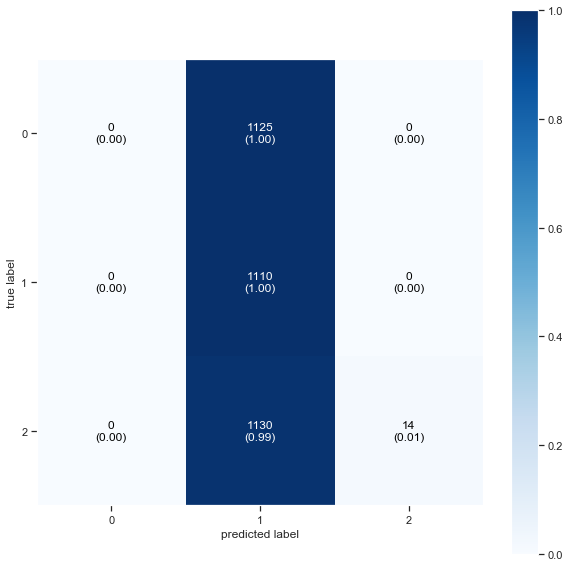

In [157]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Ensemble Technique to combine all algorithms and making one

In [158]:
svc = LinearSVC(C=1, max_iter=500)
nab  = GaussianNB(var_smoothing=1e-08)
log  = LogisticRegression(C=2, max_iter=100)
raf  = RandomForestClassifier(min_samples_leaf=10, min_samples_split=20,random_state=100)

In [159]:
from sklearn.ensemble import VotingClassifier
Ens = VotingClassifier( estimators= [('SVM',svc),('NB',nab),('Log',log),('raf',raf)], voting = 'hard')
Ens= Ens.fit(X_train , y_train)
Ens

VotingClassifier(estimators=[('SVM',
                              LinearSVC(C=1, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=500,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)),
                             ('NB',
                              GaussianNB(priors=None, var_smoothing=1e-08)),
                             ('Log',
                              LogisticRegression(C=2, class_weight=None,
                                                 dual=False, fit_intercept=Tru...
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
               

# Accuracy

In [160]:
y_pred1 = Ens.predict(X_test)
en=Ens.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(Ens.score(X_test, y_test)))

Accuracy score= 0.36


# Precision, Recall, F1

In [161]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.34      0.96      0.51      1125
     neutral       0.60      0.06      0.11      1110
    positive       0.64      0.07      0.12      1144

    accuracy                           0.36      3379
   macro avg       0.53      0.36      0.25      3379
weighted avg       0.53      0.36      0.25      3379





# Confusion Matrix



confusion matrix


[[1080   20   25]
 [1021   70   19]
 [1040   27   77]]




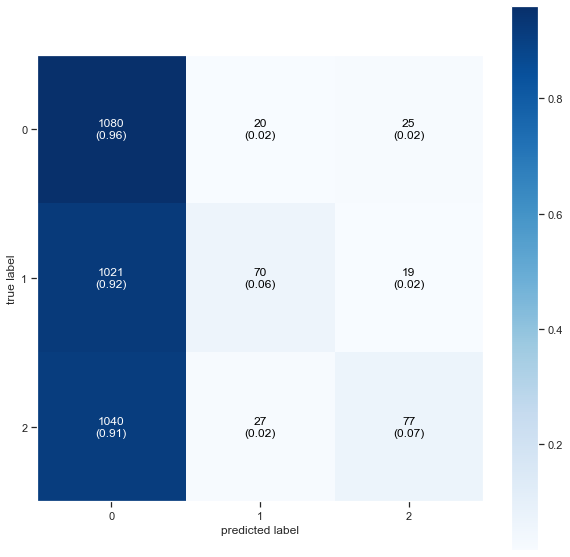

In [162]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Comparison of all algorithms Results

In [163]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["SVM Algorithm", round(dm,2)])
x.add_row(["Naive Bayes Algorithm", round(nb,2)])
x.add_row(["LogisticRegression Algorithm", round(lr,2)])
x.add_row(["Random Forest Algorithm", round(rf,2)])
x.add_row(["Ensemble Modelling", round(en,2)])

print(x)
print('\n')



Comparison of all algorithm results
+------------------------------+----------+
|            Model             | Accuracy |
+------------------------------+----------+
|        SVM Algorithm         |   0.36   |
|    Naive Bayes Algorithm     |   0.36   |
| LogisticRegression Algorithm |   0.36   |
|   Random Forest Algorithm    |   0.33   |
|      Ensemble Modelling      |   0.36   |
+------------------------------+----------+




# Best Model is Ensemble Model because of accuracy and hypothesis of all algorithms

In [164]:
x = PrettyTable()
print('\n')
print("Best Model.")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Ensemble Modelling",round(en,2)])
print(x)
print('\n')



Best Model.
+--------------------+----------+
|       Model        | Accuracy |
+--------------------+----------+
| Ensemble Modelling |   0.36   |
+--------------------+----------+


